In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import examples.utils as utils

In [2]:
DATA_FILE = "examples/data/birth_life_2010.txt"

In [3]:
data, n_samples = utils.read_birth_life_data(DATA_FILE)

In [11]:
tf.reset_default_graph()
x = tf.placeholder(tf.float32, name = "x")
y = tf.placeholder(tf.float32, name = "y")
w = tf.get_variable("weights", initializer = tf.constant(0.0))
b = tf.get_variable("bias", initializer = tf.constant(0.0))
ypred = w*x + b
loss = tf.square(y-ypred, name = "loss")
opt = tf.train.GradientDescentOptimizer(learning_rate = 0.001).minimize(loss)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for i in range(100):
        total_loss = 0
        for u,v in data:
            _,l = sess.run([opt,loss], feed_dict ={x:u, y:v})
            total_loss += l
        if(i%20 == 0):
            print("Iteration = {0} - Loss = {1}".format(i,total_loss/n_samples))
    
    w_out, b_out = sess.run([w,b])
    

Iteration = 0 - Loss = 1661.8637834631543
Iteration = 20 - Loss = 119.20935661137888
Iteration = 40 - Loss = 37.305591759538146
Iteration = 60 - Loss = 30.524590178362192
Iteration = 80 - Loss = 30.04458791257593


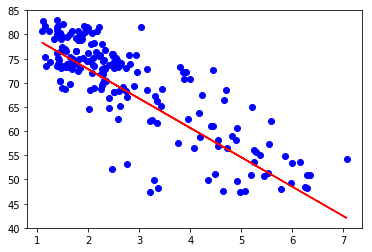

In [12]:
plt.plot(data[:,0],data[:,1],'bo', label = "Real_data")
plt.plot(data[:,0],w_out*data[:,0] + b_out,'r')
plt.show()

In [20]:
tf.reset_default_graph()

dataset = tf.data.Dataset.from_tensor_slices((data[:,0],data[:,1]))
iterator = dataset.make_initializable_iterator()
x,y = iterator.get_next()

w = tf.get_variable("weights", initializer = tf.constant(0.0))
b = tf.get_variable("bias", initializer = tf.constant(0.0))

ypred = w*x + b
loss = tf.square(y-ypred, name = "loss")

opt = tf.train.GradientDescentOptimizer(learning_rate = 0.001).minimize(loss)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for i in range(100):
        sess.run(iterator.initializer)
        total_loss = 0
        try:
            while True:
                _,l = sess.run([opt,loss])
                total_loss +=l
        except tf.errors.OutOfRangeError:
            pass
        if(i%20 == 0):
            print("Iteratio - {0}, loss - {1}".format(i, total_loss/nsamples))
                


KeyboardInterrupt: 